<a href="https://colab.research.google.com/github/TharaPR/Learnings_from_CodeBasics/blob/main/Exercise_OneHotEncoding_LabelEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Create a Simple Linear Regression using One Hot Encoding and Label Encoding

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

Read the CSV file from the link

In [34]:
url = 'https://raw.githubusercontent.com/TharaPR/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv'
df = pd.read_csv(url)

In [35]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Car Model need to be represented as dummy variables through one hot encoding values

In [36]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


Merge this dummies dataframe with the original data frame

In [37]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


Drop the town column. In addition drop one of the dummies column to avoid dummies trap

In [38]:
final = merged.drop(['Car Model', 'Audi A5'], axis='columns')

In [39]:
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


Plot a scatter plot to see the relation between Mileage, Age and Sell Price in 2D

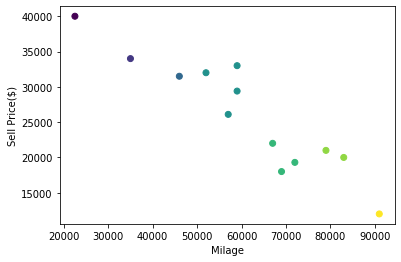

In [40]:
plt.xlabel('Milage')
plt.ylabel('Sell Price($)')
plt.scatter(df.Mileage, df['Sell Price($)'], c=df['Age(yrs)'])
plt.show()

Scatter plot in 3D

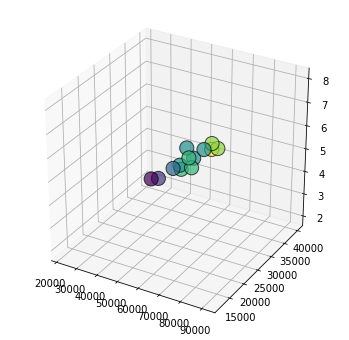

In [41]:
#plt.xlabel('Milage')
#plt.ylabel('Sell Price($)')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Mileage, df['Sell Price($)'], df['Age(yrs)'],
           linewidths=1, alpha=.7,
           edgecolor = 'k',
           s=200,
           c=df['Age(yrs)'])

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
X = final.drop(['Sell Price($)'], axis='columns')
y = final['Sell Price($)']

In [44]:
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [45]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [46]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the price of Mercedez Benz that is 4 years old with mileage of 45000

In [47]:
model.predict([[45000,4, 0,1]])

array([36991.31721061])

Predict the price of BMW that is 7 years old with mileage of 86000


In [48]:
model.predict([[86000, 7, 1, 0]])

array([11080.74313219])

Check the accuracy of the model

In [49]:
model.score(X,y)

0.9417050937281083

Use One Hot Encoding from Sklearn

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Create a new dataframe with label encoded values for Car Model

In [51]:
dfle = df
print(dfle.columns)
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')


,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [52]:
X = dfle[['Car Model', 'Mileage', 'Age(yrs)']].values # Convert the features to two dimensional array
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [53]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')
#ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),[0])], remainder='passthrough') #This commented line and the previous ct line gives the same output

In [55]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [56]:
X = X[:,1:] # Remove first column to avoid dummy variables trap
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [57]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the price of Mercedez Benz that is 4 years old with mileage of 45000

In [59]:
model.predict([[0,1, 45000,4]]) 

array([36991.31721062])

Predict the price of BMW that is 7 years old with mileage of 86000

In [61]:
model.predict([[1,0,86000, 7]]) 

array([11080.74313219])